# Data Preperation

In [19]:
# importing libraries
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
# reading data
df = pd.read_csv('/content/IBRD_Dataset.csv')
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,05/31/2023 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,05/31/2023 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.01,0.01,8.767200e+07,8.767200e+07,0.0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,05/31/2023 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0.0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,05/31/2023 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0.0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,05/31/2023 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.00,0.00,1.014200e+07,1.014200e+07,0.0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


In [21]:
print('df.shape : ', df.shape, '\n')
df.info()

df.shape :  (5785, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   End of Period                 5785 non-null   object 
 1   Loan Number                   5785 non-null   object 
 2   Region                        5785 non-null   object 
 3   Country Code                  5784 non-null   object 
 4   Country                       5784 non-null   object 
 5   Borrower                      5727 non-null   object 
 6   Guarantor Country Code        5507 non-null   object 
 7   Guarantor                     5507 non-null   object 
 8   Loan Type                     5784 non-null   object 
 9   Loan Status                   5784 non-null   object 
 10  Interest Rate                 5784 non-null   float64
 11  Currency of Commitment        0 non-null      float64
 12  Project ID                    5784 no

# Data Definition
| Variables | Columns Definition |
| :-: | :-: |
| End of Period | End of Period Date represents the date as of which balances are shown in the report. |
| Loan Number | For IBRD loans and IDA credits or grants a loan number consists of the organization prefix (IBRD/IDA) and a five-character label that uniquely identifies the loan within the organization. |
| Region | World Bank Region to which the country and loan belong. Country lending is grouped into regions based on the current World Bank administrative (rather than geographic) region where project implementation takes place. |
| Country Code | Country Code according to the World Bank country list. This might be different from the ISO country code. |
| Country | Country to which a loan has been issued. |
| Borrower | The representative of the borrower to which the Bank loan is made. |
| Guarantor Country Code | Country Code of the Guarantor according to the World Bank country list. This might be different from the ISO country code. |
| Guarantor | The Guarantor guarantees repayment to the Bank if the borrower does not repay. |
| Loan Type | A type of loan/loan instrument for which distinctive accounting and/or other actions need to be performed. |
| Loan Status | Status of the loan. |
| Interest Rate | Current Interest rate or service charge applied to loan. |
| Currency of Commitment | The currency in which a borrower’s loan, credit or grant is denominated. |
| Project ID | A Bank project is referenced by a project ID (Pxxxxxxx). More than one loan, credit, or grant may be associated with one Project ID. |
| Project Name | Short descriptive project name. |
| Original Principal Amount | The original US dollar amount of the loan that is committed and approved. |
| Cancelled Amount | The portion of the undisbursed balance which has been cancelled (i.e. no longer available for future disbursement). Cancellations include terminations (where approved loan agreements were never signed). |
| Undisbursed Amount | The amount of a loan commitment that is still available to be drawn down. |
| Disbursed Amount | The amount that has been disbursed from a loan commitment in equivalent US dollars, calculated at the exchange rate on the value date of the individual disbursements. |
| Repaid to IBRD | Total principal amounts paid or prepaid to IBRD in US dollars, calculated at the exchange rate on the value date of the individual repayments. |
| Due to IBRD | Where the exchange adjustment is shown separately, this is the amount disbursed and outstanding expressed as a stock of debt in historical US Dollars. Where the exchange adjustment is not shown separately, this is the amount due and outstanding as of the End of Period date. |
| Exchange Adjustment | The increase (decrease) in value of disbursed and outstanding amount due to exchange rate fluctuations. This amount added to “Due to IBRD” yields “Borrower’s Obligation”; includes exchange adjustments on the amounts Due to 3rd parties. |
| Borrower's Obligation | The Borrower Obligation is the outstanding balance for the loan as of the end of period date in US dollars equivalent.
The Borrower's Obligation includes the amounts outstanding Due to 3rd parties |
| Sold 3rd Party | Portion of loan sold to a third party. |
| Repaid 3rd Party | Amount repaid to a third party. |
| Due 3rd Party | Amount due to a third party. |
| Loans Held | The sum of the disbursed and outstanding amounts (net of repayments, i.e. Due to IBRD/IDA) plus undisbursed available amounts. |
| First Repayment Date | The date on which principal repayment starts. |
| Last Repayment Date | The date specified in the loan/credit agreement (amended for any partial prepayments) on which the last principal installment must be repaid by the Borrower. |
| Agreement Signing Date | The date the borrower and the Bank sign the loan agreement. |
| Board Approval Date | The date the World Bank approves the loan. |
| Effective Date (Most Recent) | The date on which a legal agreement becomes effective, or is expected to become effective. |
| Closed Date (Most Recent) | The date specified in the legal agreement (or extension) after which the Bank may, by notice to the borrower, terminate the right to make withdrawals from the loan account. |
| Last Disbursement Date | The date on which the last disbursement was made (prior to the end of period date). |.

# Data Validation

| Variables | Data Types |
| :-: | :-: |
| End of Period | Datetime |
| First Repayment Date | Datetime |
| Last Repayment Date | Datetime |
| Agreement Signing Date | Datetime |
| Board Approval Date | Datetime |
| Effective Date (Most Recent) | Datetime |
| Closed Date (Most Recent) | Datetime |
| Last Disbursement Date | Datetime |

In [22]:
date_format = "%m/%d/%Y %I:%M:%S %p"
columns_list = ["End of Period", "First Repayment Date", "Last Repayment Date", "Agreement Signing Date", "Board Approval Date",
                "Effective Date (Most Recent)", "Closed Date (Most Recent)", "Last Disbursement Date"]
df[columns_list] = df[columns_list].apply(lambda x: pd.to_datetime(x, format = date_format))
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,2023-05-31,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0.0,0.0,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT
1,2023-05-31,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.01,0.01,8.767200e+07,8.767200e+07,0.0,0.0,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT
2,2023-05-31,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0.0,0.0,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT
3,2023-05-31,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0.0,0.0,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT
4,2023-05-31,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.00,0.00,1.014200e+07,1.014200e+07,0.0,0.0,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT


In [23]:
print(' df.shape : ', df.shape, '\n')
df.info()

 df.shape :  (5785, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 5785 non-null   datetime64[ns]
 1   Loan Number                   5785 non-null   object        
 2   Region                        5785 non-null   object        
 3   Country Code                  5784 non-null   object        
 4   Country                       5784 non-null   object        
 5   Borrower                      5727 non-null   object        
 6   Guarantor Country Code        5507 non-null   object        
 7   Guarantor                     5507 non-null   object        
 8   Loan Type                     5784 non-null   object        
 9   Loan Status                   5784 non-null   object        
 10  Interest Rate                 5784 non-null   float64       
 11  Curr

# Performing Exploratory Data Analysis

## Checking and handling missing values

In [24]:

df_missing = pd.DataFrame(df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["Features", "Missing_Percentage"]
df_missing

,Features,Missing_Percentage
0,End of Period,0.000000
1,Loan Number,0.000000
2,Region,0.000000
3,Effective Date (Most Recent),0.017286
4,Board Approval Date,0.017286
5,Last Repayment Date,0.017286
6,First Repayment Date,0.017286
7,Loans Held,0.017286
8,Due 3rd Party,0.017286
9,Repaid 3rd Party,0.017286


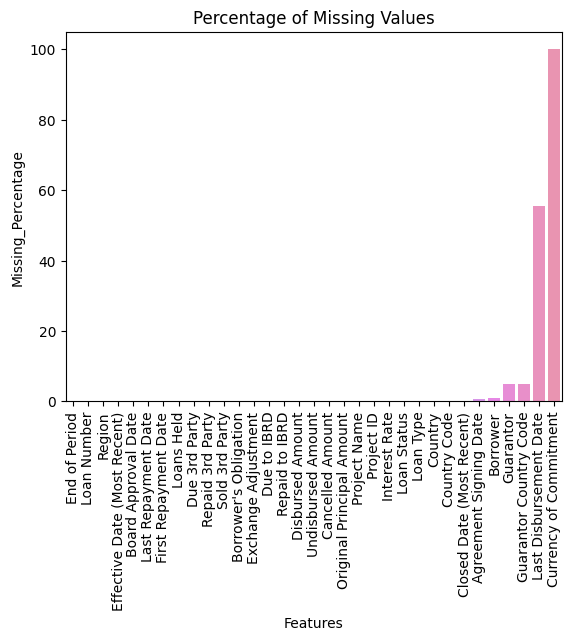

In [25]:
sns.barplot(data = df_missing,
            x = "Features",
            y = "Missing_Percentage")
plt.title("Percentage of Missing Values")
plt.xticks(rotation = 'vertical')
plt.show()

In [26]:
# handling missing values
df.drop(columns = ["Currency of Commitment", "Due 3rd Party", "Undisbursed Amount", "Sold 3rd Party", "Repaid 3rd Party", "Exchange Adjustment", "Due to IBRD", "Loans Held", "Borrower's Obligation", "Cancelled Amount"], inplace = True)

print(' df.shape : ', df.shape, '\n')
df.head()

 df.shape :  (5785, 23) 



,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,Disbursed Amount,Repaid to IBRD,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,2023-05-31,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,P037383,RECONSTRUCTION,2.500000e+08,2.500000e+08,3.800000e+04,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT
1,2023-05-31,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,1.910442e+08,1.910442e+08,1.033722e+08,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT
2,2023-05-31,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,3.955788e+06,3.955788e+06,0.000000e+00,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT
3,2023-05-31,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037362,RECONSTRUCTION,4.000000e+07,4.000000e+07,1.777100e+07,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT
4,2023-05-31,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037451,RECONSTRUCTION,1.200000e+07,1.176198e+07,1.619983e+06,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT


## Checking for Zero Values

In [27]:

df_zero = pd.DataFrame(df[df == 0].count().sort_values() / len(df) * 100).reset_index()
df_zero.columns = ["Features", "Zero_Percentage"]
df_zero

,Features,Zero_Percentage
0,End of Period,0.000000
1,Effective Date (Most Recent),0.000000
2,Board Approval Date,0.000000
3,Agreement Signing Date,0.000000
4,Last Repayment Date,0.000000
5,First Repayment Date,0.000000
6,Project Name,0.000000
7,Closed Date (Most Recent),0.000000
8,Loan Status,0.000000
9,Project ID,0.000000


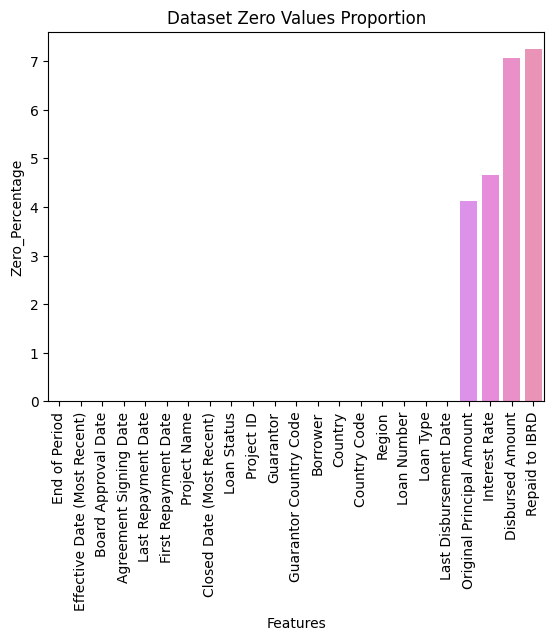

In [28]:
sns.barplot(data = df_zero,
            x = "Features",
            y = "Zero_Percentage")
plt.title("Dataset Zero Values Proportion")
plt.xticks(rotation = 'vertical')
plt.show()

## Checking for duplicate values

In [29]:
df_duplicated = df[df.duplicated(keep = False)]
print(' df.shape : ', df.shape, '\n')
df_duplicated

 df.shape :  (5785, 23) 



,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,Disbursed Amount,Repaid to IBRD,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date


### Checking for Loan Agreement Signing Dates Timespan

In [30]:
agreement_date_max = df["Agreement Signing Date"].max()
agreement_date_min = df["Agreement Signing Date"].min()

print(f"Max Agreement Signing Date: {agreement_date_max}")
print(f"Min Agreement Signing Date: {agreement_date_min}")

Max Agreement Signing Date: 2001-04-23 00:00:00
Min Agreement Signing Date: 1947-05-09 00:00:00


### Checking Board Approval Dates Timespan

In [31]:
board_approval_max = df["Board Approval Date"].max()
board_approval_min = df["Board Approval Date"].min()

print(f"Max Board Approval Date: {board_approval_max}")
print(f"Min Board Approval Date: {board_approval_min}")

Max Board Approval Date: 2001-04-03 00:00:00
Min Board Approval Date: 1947-05-09 00:00:00


### Checking Loan Effective Dates Timespan

In [32]:
effective_date_max = df["Effective Date (Most Recent)"].max()
effective_date_min = df["Effective Date (Most Recent)"].min()

print(f"Max Effective Date: {effective_date_max}")
print(f"Min Effective Date: {effective_date_min}")

Max Effective Date: 2001-07-03 00:00:00
Min Effective Date: 1947-06-09 00:00:00


# Data Visualization

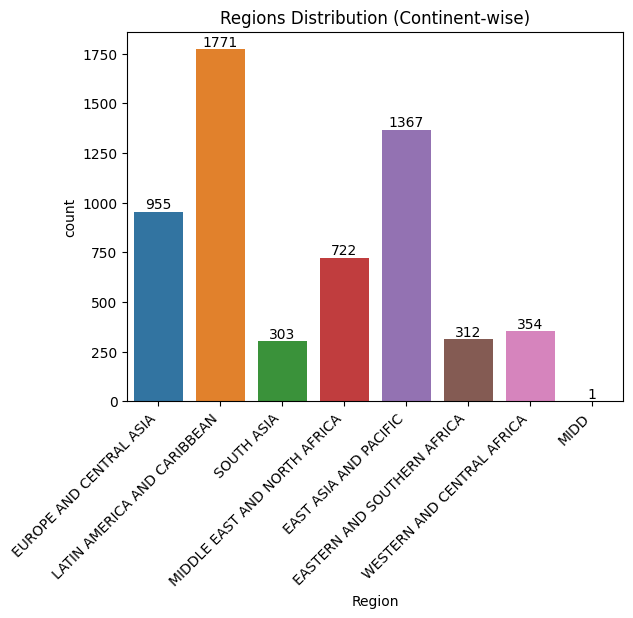

In [33]:
# Region Distribution
plt.title("Regions Distribution (Continent-wise)")
regions_distribution = sns.countplot(data = df, x = "Region")
regions_distribution.bar_label(regions_distribution.containers[0])
regions_distribution.set_xticklabels(regions_distribution.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [36]:
import plotly.express as px

# Loan Counts Distribution by Country
country_count = df["Country"].value_counts().reset_index()
country_count.columns = ["country", "count"]
fig = px.choropleth(country_count,
                    locations = "country",
                    locationmode = 'country names',
                    color = "count",
                    hover_name = "country",
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Loan count distribution (Country-wise)")
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()

In [37]:
# Guarantor Counts Distribution
guarantor_count = df["Guarantor"].value_counts().reset_index()
guarantor_count.columns = ["guarantor", "count"]
fig = px.choropleth(guarantor_count,
                    locations = "guarantor",
                    locationmode = 'country names',
                    color = "count",
                    hover_name = "guarantor",
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Guarantor Counts Distribution by Country")
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()

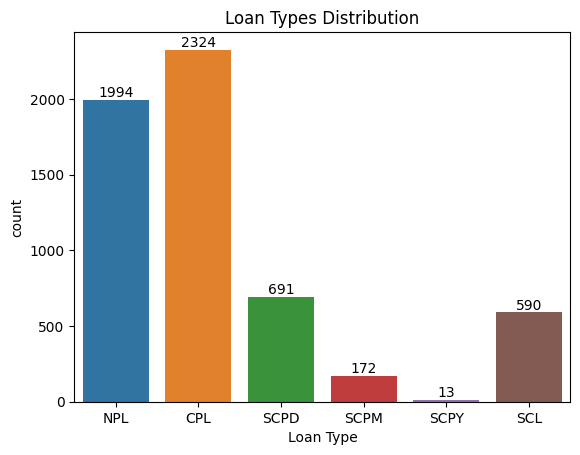

In [38]:
plt.title("Loan Types Distribution")
loan_types_distribution = sns.countplot(data = df, x = "Loan Type")
loan_types_distribution.bar_label(loan_types_distribution.containers[0])
plt.show()

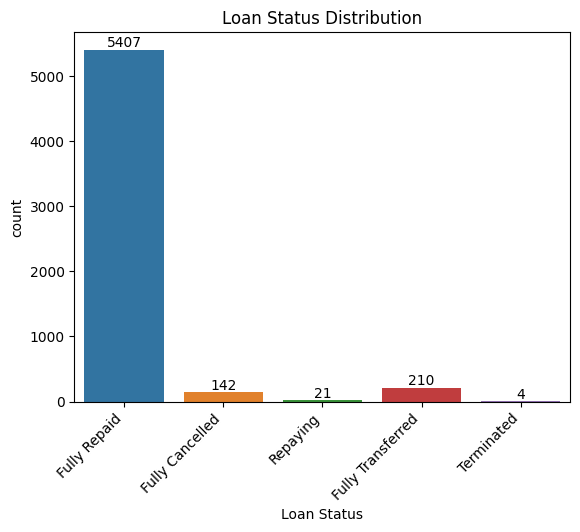

In [39]:
# Loan Status Distribution
plt.title("Loan Status Distribution")
loan_statuses_distribution = sns.countplot(data = df, x = "Loan Status")
loan_statuses_distribution.bar_label(loan_statuses_distribution.containers[0])
loan_statuses_distribution.set_xticklabels(loan_statuses_distribution.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

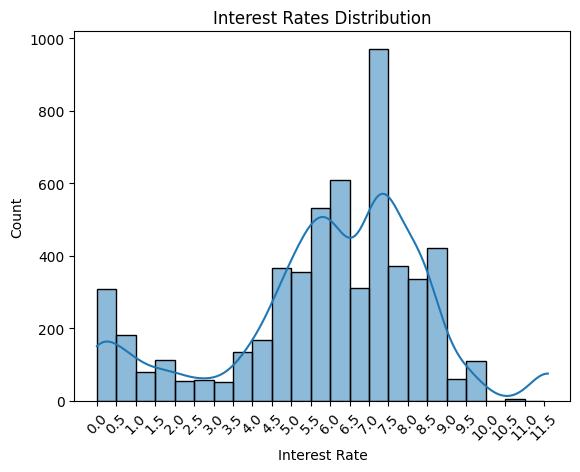

In [40]:
# Interest Rates Distribution
plt.title("Interest Rates Distribution")
interest_rates_bins = np.arange(df["Interest Rate"].min(), df["Interest Rate"].max(), 0.5)
interest_rates_plot = sns.histplot(data = df,
                                   x = "Interest Rate",
                                   bins = interest_rates_bins,
                                   kde = True)
interest_rates_plot.set_xticks(interest_rates_bins)
plt.xticks(rotation = 45)
plt.show()

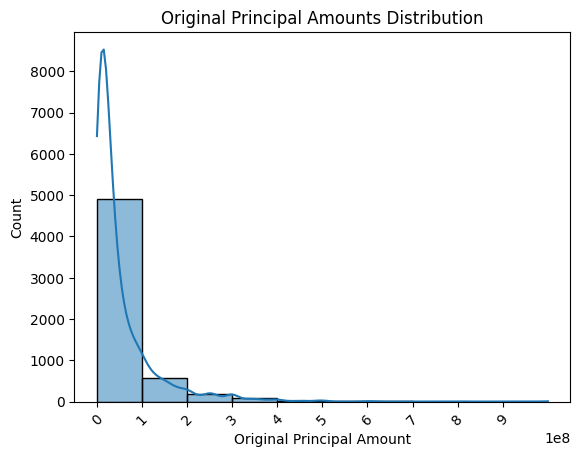

In [41]:
plt.title("Original Principal Amounts Distribution")
original_principal_amounts_bins = np.arange(df["Original Principal Amount"].min(), df["Original Principal Amount"].max(), 100000000)
original_principal_amounts_plot = sns.histplot(data = df,
                                               x = "Original Principal Amount",
                                               bins = original_principal_amounts_bins,
                                               kde = True)
original_principal_amounts_plot.set_xticks(original_principal_amounts_bins)
plt.xticks(rotation = 45)
plt.show()

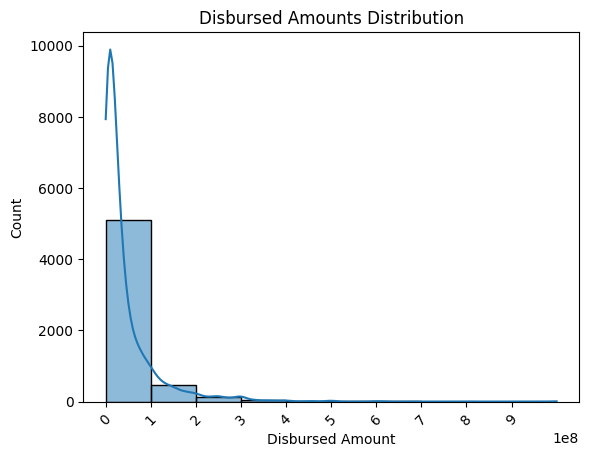

In [42]:
plt.title("Disbursed Amounts Distribution")
disbursed_amounts_bins = np.arange(df["Disbursed Amount"].min(), df["Disbursed Amount"].max(), 100000000)
disbursed_amounts_plot = sns.histplot(data = df,
                                      x = "Disbursed Amount",
                                      bins = disbursed_amounts_bins,
                                      kde = True)
disbursed_amounts_plot.set_xticks(disbursed_amounts_bins)
plt.xticks(rotation = 45)
plt.show()

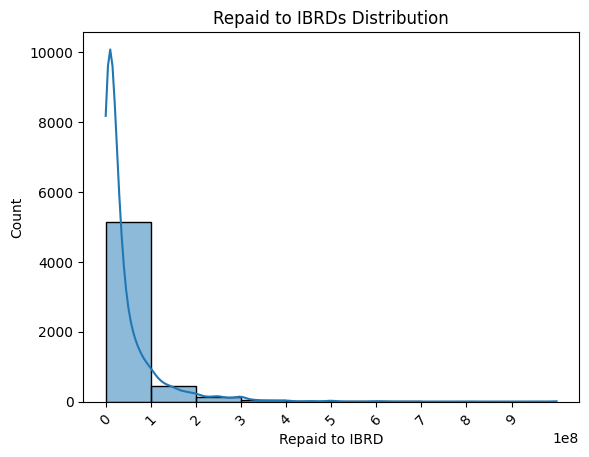

In [43]:
plt.title("Repaid to IBRDs Distribution")
repaid_to_ibrds_bins = np.arange(df["Repaid to IBRD"].min(), df["Repaid to IBRD"].max(), 100000000)
repaid_to_ibrds_plot = sns.histplot(data = df,
                                    x = "Repaid to IBRD",
                                    bins = repaid_to_ibrds_bins,
                                    kde = True)
repaid_to_ibrds_plot.set_xticks(repaid_to_ibrds_bins)
plt.xticks(rotation = 45)
plt.show()

Good label/ Bad label

In [44]:
df = df[df["Loan Status"].isin(["Fully Cancelled", "Terminated", "Fully Repaid"])]
print(' df.shape : ', df.shape, '\n')
df.head()

 df.shape :  (5553, 23) 



,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,Disbursed Amount,Repaid to IBRD,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,2023-05-31,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,P037383,RECONSTRUCTION,2.500000e+08,2.500000e+08,3.800000e+04,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT
1,2023-05-31,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,1.910442e+08,1.910442e+08,1.033722e+08,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT
2,2023-05-31,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,3.955788e+06,3.955788e+06,0.000000e+00,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT
3,2023-05-31,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037362,RECONSTRUCTION,4.000000e+07,4.000000e+07,1.777100e+07,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT
4,2023-05-31,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037451,RECONSTRUCTION,1.200000e+07,1.176198e+07,1.619983e+06,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT


In [45]:
df["bad"] = np.where(df["Loan Status"].isin(["Fully Cancelled", "Terminated"]), 1, 0)
print(' df.shape : ', df.shape, '\n')
df.head()

 df.shape :  (5553, 24) 



<ipython-input-45-0e989f85a861>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,Disbursed Amount,Repaid to IBRD,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,bad
0,2023-05-31,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,P037383,RECONSTRUCTION,2.500000e+08,2.500000e+08,3.800000e+04,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT,0
1,2023-05-31,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,1.910442e+08,1.910442e+08,1.033722e+08,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT,0
2,2023-05-31,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,3.955788e+06,3.955788e+06,0.000000e+00,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT,0
3,2023-05-31,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037362,RECONSTRUCTION,4.000000e+07,4.000000e+07,1.777100e+07,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT,0
4,2023-05-31,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037451,RECONSTRUCTION,1.200000e+07,1.176198e+07,1.619983e+06,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT,0


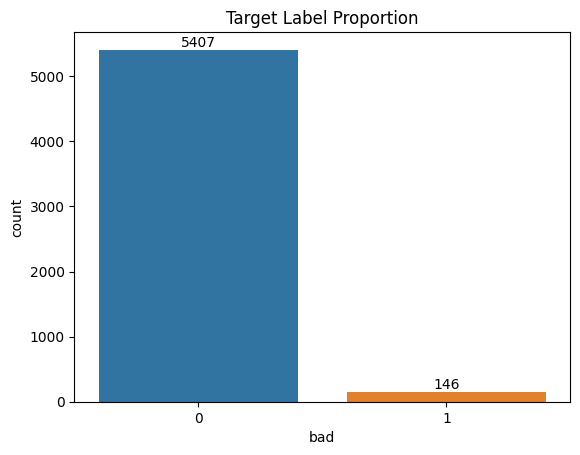

In [46]:
plt.title("Target Label Proportion")
y_proportion = sns.countplot(data = df, x = df["bad"])
y_proportion.bar_label(y_proportion.containers[0])
plt.show()

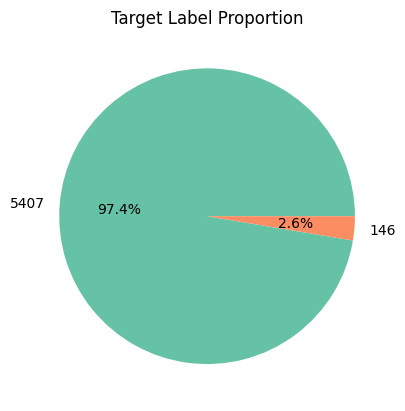

In [47]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x = df["bad"].value_counts(),
        labels = df["bad"].value_counts(),
        colors = sns.color_palette('Set2'),
        autopct = '%1.1f%%')
plt.show()

# Statistical Analysis

In [48]:
df.describe()

,Interest Rate,Original Principal Amount,Disbursed Amount,Repaid to IBRD,bad
count,5553.000000,5.553000e+03,5.553000e+03,5.553000e+03,5553.000000
mean,5.920551,5.278618e+07,4.427214e+07,4.368736e+07,0.026292
std,2.630805,7.383959e+07,6.726204e+07,6.729054e+07,0.160017
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.840000,1.006500e+07,7.300000e+06,6.892214e+06,0.000000
50%,6.140000,2.520000e+07,2.050000e+07,1.979589e+07,0.000000
75%,7.540000,6.309436e+07,5.039500e+07,5.000000e+07,0.000000
max,11.600000,1.000000e+09,1.000000e+09,1.000000e+09,1.000000


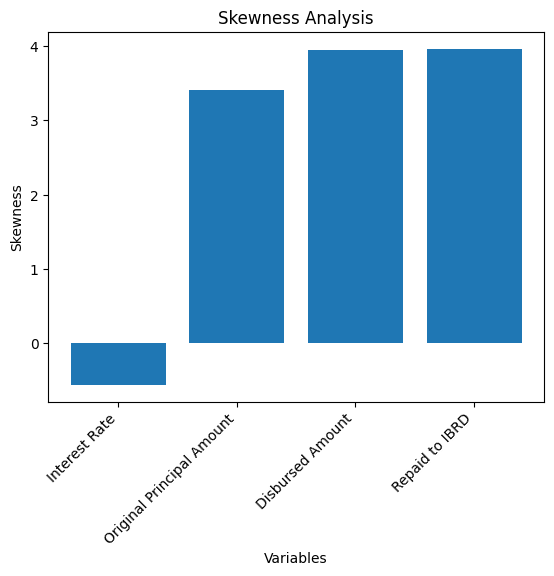

In [49]:
numeric_columns = df.select_dtypes(include = [np.number]).drop(columns = ["bad"]).columns
df_skewness = df[numeric_columns].skew()
df_skewness = pd.DataFrame({"variables": df_skewness.index, "skewness": df_skewness.values})

plt.title("Skewness Analysis")
plt.bar(df_skewness["variables"], df_skewness["skewness"])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

### Chi squared Analysis

In [50]:
df_statistics = df.drop("bad", axis = 1)
df_target = df["bad"]

categorical_columns = ["Region", "Country Code", "Country", "Borrower", "Guarantor Country Code", "Guarantor", "Loan Type", "Loan Status"]
numerical_columns = ["Interest Rate", "Original Principal Amount", "Disbursed Amount", "Repaid to IBRD"]

df_categorical = df_statistics[categorical_columns].copy()
df_numerical = df_statistics[numerical_columns].copy()
df_categorical.shape, df_numerical.shape



((5553, 8), (5553, 4))

In [51]:
df_categorical.columns

Index(['Region', 'Country Code', 'Country', 'Borrower',
       'Guarantor Country Code', 'Guarantor', 'Loan Type', 'Loan Status'],
      dtype='object')

In [52]:
df_numerical.columns

Index(['Interest Rate', 'Original Principal Amount', 'Disbursed Amount',
       'Repaid to IBRD'],
      dtype='object')

In [54]:
from scipy.stats import chi2_contingency

chi2_result = pd.DataFrame(columns = ["variables", "p-value"])

for column in df_categorical.columns:
    cross_tab = pd.crosstab(df_target, df_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(cross_tab)
    new_row = pd.DataFrame({"variables": [column], "p-value": [round(p_value, 10)]})
    chi2_result = pd.concat([chi2_result, new_row], ignore_index = True)

chi2_result = chi2_result.sort_values(by = "p-value", ascending = True)
chi2_result.reset_index(drop = True, inplace = True)
chi2_result

,variables,p-value
0,Country Code,0.000000e+00
1,Country,0.000000e+00
2,Borrower,0.000000e+00
3,Loan Status,0.000000e+00
4,Loan Type,3.100000e-09
5,Guarantor Country Code,3.380000e-08
6,Guarantor,3.380000e-08
7,Region,7.100000e-08


### ANOVA F Analysis

In [56]:
from sklearn.feature_selection import f_classif

df_numerical.fillna(df_numerical.mean(), inplace = True)

f_statistic, p_values = f_classif(df_numerical, df_target)

anova_f_table = pd.DataFrame({"variables": df_numerical.columns, "f-score": f_statistic, "p-values": p_values.round(decimals = 10)})
anova_f_table.sort_values(by = "f-score",
                          ascending = False,
                          inplace = True,
                          ignore_index = True)

anova_f_table

,variables,f-score,p-values
0,Disbursed Amount,65.717084,0.000000
1,Repaid to IBRD,63.917771,0.000000
2,Interest Rate,8.766819,0.003081
3,Original Principal Amount,0.645644,0.421709


### Correlation Matrix

In [57]:
df_numerical.corr()

,Interest Rate,Original Principal Amount,Disbursed Amount,Repaid to IBRD
Interest Rate,1.000000,-0.155035,-0.114060,-0.116688
Original Principal Amount,-0.155035,1.000000,0.929050,0.927959
Disbursed Amount,-0.114060,0.929050,1.000000,0.997389
Repaid to IBRD,-0.116688,0.927959,0.997389,1.000000


<Axes: >

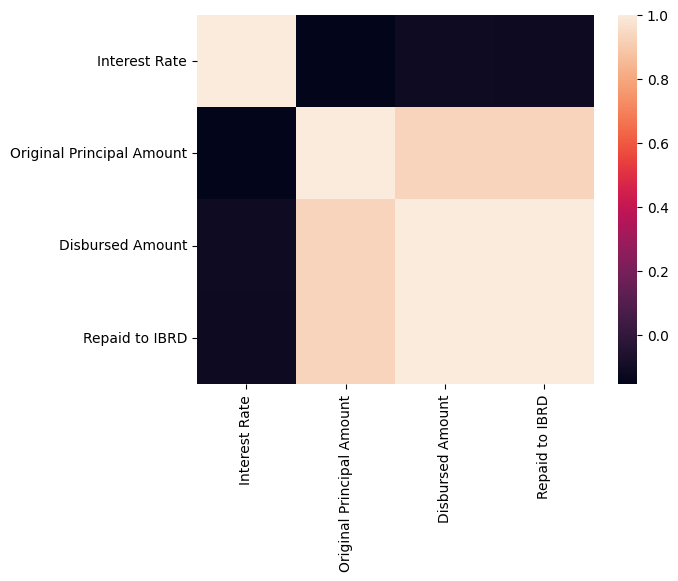

In [58]:
sns.heatmap(data = df_numerical.corr())

## Preprocessing

In [59]:
# Variables Selection
df.drop(columns = ["Disbursed Amount", "Repaid to IBRD"], inplace = True)
print(' df.shape : ', df.shape, '\n')
df.head()

 df.shape :  (5553, 22) 



,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,bad
0,2023-05-31,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,P037383,RECONSTRUCTION,2.500000e+08,1952-11-01,1977-05-01,1947-05-09,1947-05-09,1947-06-09,1947-12-31,NaT,0
1,2023-05-31,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,1.910442e+08,1952-04-01,1972-10-01,1947-08-07,1947-08-07,1947-09-11,1948-03-31,NaT,0
2,2023-05-31,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,3.955788e+06,1953-04-01,1954-04-01,1948-05-25,1947-08-07,1948-06-01,1948-06-30,NaT,0
3,2023-05-31,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037362,RECONSTRUCTION,4.000000e+07,1953-02-01,1972-08-01,1947-08-22,1947-08-22,1947-10-17,1949-03-31,NaT,0
4,2023-05-31,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,P037451,RECONSTRUCTION,1.200000e+07,1949-07-15,1972-07-15,1947-08-28,1947-08-28,1947-10-24,1949-03-31,NaT,0


In [60]:
#  Data Segregation
X = df.drop("bad", axis = 1)
y = df["bad"]
print(' x.shape : ', X.shape, '\n')
print(' y.shape : ', y.shape, '\n')
print('X', X.head())

 x.shape :  (5553, 21) 

 y.shape :  (5553,) 

X   End of Period Loan Number                   Region Country Code  \
0    2023-05-31   IBRD00010  EUROPE AND CENTRAL ASIA           FR   
1    2023-05-31   IBRD00020  EUROPE AND CENTRAL ASIA           NL   
2    2023-05-31   IBRD00021  EUROPE AND CENTRAL ASIA           NL   
3    2023-05-31   IBRD00030  EUROPE AND CENTRAL ASIA           DK   
4    2023-05-31   IBRD00040  EUROPE AND CENTRAL ASIA           LU   

       Country         Borrower Guarantor Country Code Guarantor Loan Type  \
0       France  CREDIT NATIONAL                     FR    France       NPL   
1  Netherlands              NaN                    NaN       NaN       NPL   
2  Netherlands              NaN                    NaN       NaN       NPL   
3      Denmark              NaN                    NaN       NaN       NPL   
4   Luxembourg              NaN                    NaN       NaN       NPL   

    Loan Status  Interest Rate Project ID    Project Name  \
0  Ful

In [61]:
print('Y', y.head())

Y 0    0
1    0
2    0
3    0
4    0
Name: bad, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split

#  Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777)
X_train.shape, X_test.shape
y_train.shape, y_test.shape
print(' X_train.shape : ', X_train.shape, '\n')
print(' X_test.shape : ', X_test.shape, '\n')
print(' y_train.shape : ', y_train.shape, '\n')
print(' y_test.shape : ', y_test.shape, '\n')

 X_train.shape :  (3887, 21) 

 X_test.shape :  (1666, 21) 

 y_train.shape :  (3887,) 

 y_test.shape :  (1666,) 



In [65]:
# Export Data
df.to_pickle('/content/Processed/df.pkl')
X_train.to_pickle('/content/Processed/X_train.pkl')
X_test.to_pickle('/content/Processed/X_test.pkl')
y_train.to_pickle('/content/Processed/y_train.pkl')
y_test.to_pickle('/content/Processed/y_test.pkl')